In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ctgan import CTGAN
from ctgan import load_demo
import data_describe as dd
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, StratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data = pd.read_csv('../data/S&P 500 Information Technology 50-Day.csv')
data.rename(columns={'Unnamed: 0':'date'}, inplace=True)
data = data.sort_values(by=['date'])
data = data.dropna()
data

,date,S&P 500,S&P 500 Information Technology (Sector),S&P 500 Performance (%),S&P 500 Information Technology (Sector) Performance (%),S&P 500 Information Technology (Sector) Outperform/Underperform,overall,communication,information technology commodities,video and audio,video and audio products,video and audio services
4178,2009-12-02,1109.24,355.410004,1.312485,0.965880,UNDERPERFORM,217.488,84.972,100.047,100.483,98.952,101.193
4179,2009-12-03,1099.92,354.839996,0.037289,0.424520,OUTPERFORM,217.488,84.972,100.047,100.483,98.952,101.193
4180,2009-12-04,1105.98,357.910004,-0.069573,0.463143,OUTPERFORM,217.488,84.972,100.047,100.483,98.952,101.193
4181,2009-12-07,1103.25,355.589996,-0.533732,-0.067445,OUTPERFORM,217.488,84.972,100.047,100.483,98.952,101.193
4182,2009-12-08,1091.94,353.459991,-1.450348,-0.388909,OUTPERFORM,217.488,84.972,100.047,100.483,98.952,101.193
...,...,...,...,...,...,...,...,...,...,...,...,...
7194,2021-11-24,4701.46,2986.290039,4.852728,7.399255,OUTPERFORM,280.126,76.330,47.997,111.000,37.058,138.038
7195,2021-11-26,4594.62,2908.629883,1.616263,3.289046,OUTPERFORM,280.126,76.330,47.997,111.000,37.058,138.038
7196,2021-11-29,4655.27,2985.409912,1.484354,3.624446,OUTPERFORM,280.126,76.330,47.997,111.000,37.058,138.038
7197,2021-11-30,4567.00,2956.850098,1.396956,5.537338,OUTPERFORM,280.126,76.330,47.997,111.000,37.058,138.038


## Using all data

In [3]:
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data['dow'] = data['date'].dt.dayofweek
data = data[data['dow']==3].groupby(['year','month']).nth[1].reset_index()
data

,year,month,date,S&P 500,S&P 500 Information Technology (Sector),S&P 500 Performance (%),S&P 500 Information Technology (Sector) Performance (%),S&P 500 Information Technology (Sector) Outperform/Underperform,overall,communication,information technology commodities,video and audio,video and audio products,video and audio services,dow
0,2009,12,2009-12-10,1102.35,358.239990,-0.261482,1.295025,OUTPERFORM,217.488,84.972,100.047,100.483,98.952,101.193,3
1,2010,1,2010-01-14,1148.46,374.720001,-2.110431,-0.707495,OUTPERFORM,217.281,84.849,99.258,99.515,97.230,100.487,3
2,2010,2,2010-02-11,1078.47,346.339996,-11.020997,-12.454182,UNDERPERFORM,217.353,84.868,99.067,99.560,96.987,100.634,3
3,2010,3,2010-03-11,1150.24,371.410004,5.750719,6.448654,OUTPERFORM,217.403,84.840,98.406,99.533,96.655,100.714,3
4,2010,4,2010-04-08,1186.44,380.880005,6.168177,4.680500,UNDERPERFORM,217.290,84.738,97.553,99.159,95.488,100.615,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2021,7,2021-07-08,4320.82,2631.409912,-2.530346,-3.529728,UNDERPERFORM,273.092,76.056,48.787,111.434,37.720,138.174,3
140,2021,8,2021-08-12,4460.83,2705.919922,-1.849766,-2.736126,UNDERPERFORM,274.214,76.337,49.162,111.585,37.528,138.552,3
141,2021,9,2021-09-09,4493.28,2773.729980,-4.490556,-7.014797,UNDERPERFORM,276.590,76.407,48.847,111.577,37.419,138.623,3
142,2021,10,2021-10-14,4438.26,2716.439941,-7.366228,-12.583268,UNDERPERFORM,278.524,76.317,48.278,111.427,37.366,138.439,3


In [4]:
original = data[['S&P 500 Information Technology (Sector) Outperform/Underperform','month','overall','communication', \
                 'information technology commodities','video and audio', 'video and audio products','video and audio services']]

In [5]:
data.drop(columns=['date','S&P 500 Information Technology (Sector) Outperform/Underperform','year'], inplace=True)
data.head()

,month,S&P 500,S&P 500 Information Technology (Sector),S&P 500 Performance (%),S&P 500 Information Technology (Sector) Performance (%),overall,communication,information technology commodities,video and audio,video and audio products,video and audio services,dow
0,12,1102.35,358.239990,-0.261482,1.295025,217.488,84.972,100.047,100.483,98.952,101.193,3
1,1,1148.46,374.720001,-2.110431,-0.707495,217.281,84.849,99.258,99.515,97.230,100.487,3
2,2,1078.47,346.339996,-11.020997,-12.454182,217.353,84.868,99.067,99.560,96.987,100.634,3
3,3,1150.24,371.410004,5.750719,6.448654,217.403,84.840,98.406,99.533,96.655,100.714,3
4,4,1186.44,380.880005,6.168177,4.680500,217.290,84.738,97.553,99.159,95.488,100.615,3


In [6]:
original['Performance'] = np.where(original['S&P 500 Information Technology (Sector) Outperform/Underperform'] == 'OUTPERFORM',1,0)
original = original[['Performance','month','overall','communication', \
                 'information technology commodities','video and audio', 'video and audio products','video and audio services']]

In [7]:
dd.data_summary(original)

,Info
Rows,144
Columns,8
Size in Memory,9.1 KB


,Data Type,Nulls,Zeros,Min,Median,Max,Mean,Standard Deviation,Unique,Top Frequency
Performance,int64,0,0,0,0,1,0.38,0.48,2,90
month,int64,0,0,1,6.50,12,6.50,3.45,12,12
overall,float64,0,0,217.20,238.025,280.13,241.74,14.75,142,2
communication,float64,0,0,72.92,79.92,84.97,78.97,4.10,142,2
information technology commodities,float64,0,0,46.58,61.98,100.047,66.77,15.78,144,1
video and audio,float64,0,0,97.82,100.24,111.58,102.29,3.65,139,2
video and audio products,float64,0,0,36.47,58.68,98.95,60.0095,19.0049,143,2
video and audio services,float64,0,0,100.49,114.62,138.62,117.34,11.22,143,2


None

data-describe Summary Widget

<AxesSubplot: title={'center': 'Correlation Matrix'}>

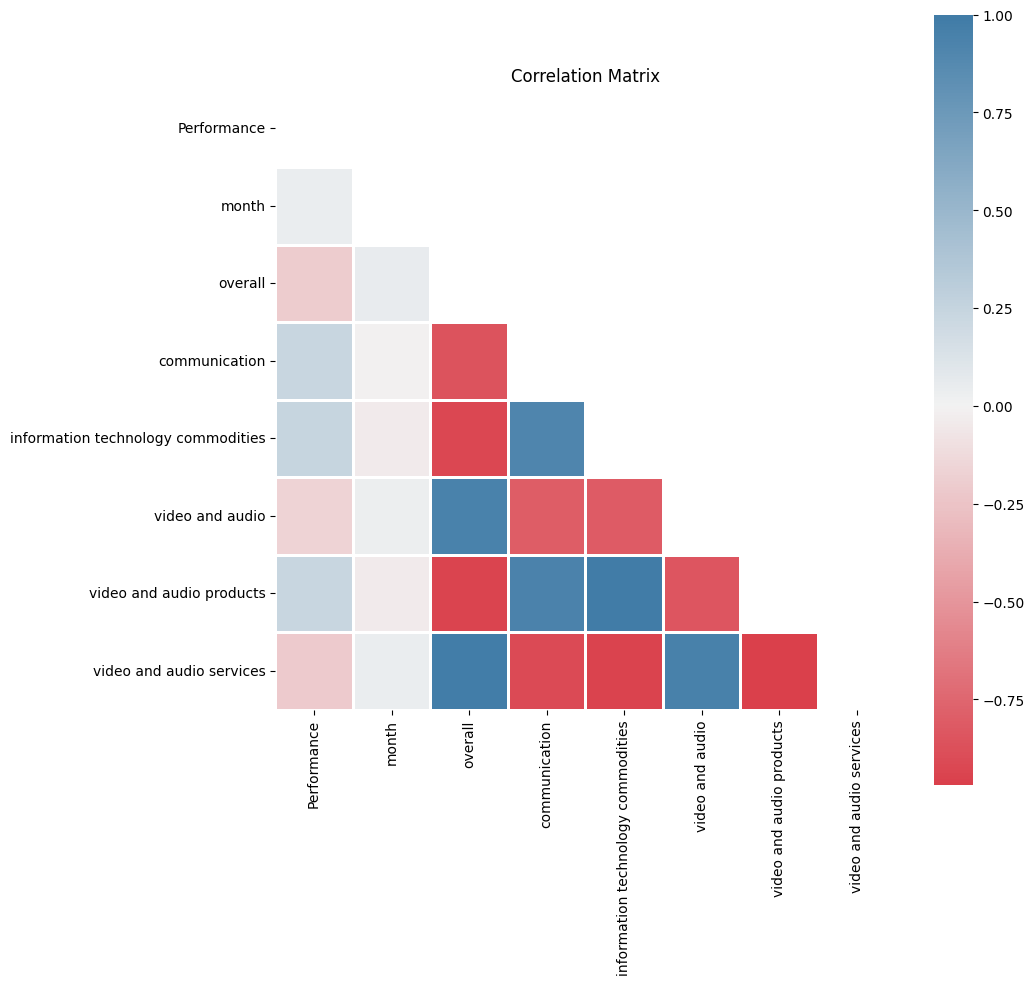

In [8]:
dd.correlation_matrix(original)

### Conditional GAN

In [9]:
discrete_columns = [
    'month'
]

ctgan = CTGAN(epochs=5000)
ctgan.fit(data, discrete_columns)

# Synthetic copy
samples = ctgan.sample(10000)
samples

,month,S&P 500,S&P 500 Information Technology (Sector),S&P 500 Performance (%),S&P 500 Information Technology (Sector) Performance (%),overall,communication,information technology commodities,video and audio,video and audio products,video and audio services,dow
0,10,2504.423408,1710.169173,-7.841796,-14.753307,269.492688,72.653518,51.366373,103.679215,40.390137,131.125356,3
1,5,1185.747295,377.820790,-2.645713,-9.683036,228.486036,83.547225,99.097818,99.052584,96.197352,105.294430,3
2,6,4057.560545,2524.585937,2.995288,6.873752,265.477261,74.583083,52.152568,106.551463,36.112224,125.058620,3
3,4,2758.676472,859.634777,3.152981,2.100421,243.967137,80.261455,56.008871,100.413171,61.523336,136.010218,3
4,8,4041.255810,1727.346054,8.625775,-3.813033,243.178257,82.374065,70.009690,105.968268,57.649130,115.104395,3
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7,3988.829279,1527.083292,-5.491649,-8.561851,254.408400,73.862022,49.896806,102.656458,42.922478,129.670300,3
9996,2,1440.765393,574.349921,-9.290394,-10.555983,227.941550,82.178814,83.659997,99.758625,89.725118,110.643707,3
9997,1,2377.093333,1506.269203,-0.561033,-9.921936,253.919709,75.470799,52.209299,110.673653,37.088942,133.321337,3
9998,12,2748.268092,1456.881925,-5.591713,-9.992014,260.019370,73.595604,54.276452,103.211861,42.054715,126.412753,3


In [10]:
samples['Performance'] = np.where(samples['S&P 500 Information Technology (Sector) Performance (%)'] > \
                                  samples['S&P 500 Performance (%)'], 1, 0)

In [11]:
samples = samples[['Performance','month', 'overall','communication', \
                 'information technology commodities','video and audio', 'video and audio products','video and audio services']]
samples.head()

,Performance,month,overall,communication,information technology commodities,video and audio,video and audio products,video and audio services
0,0,10,269.492688,72.653518,51.366373,103.679215,40.390137,131.125356
1,0,5,228.486036,83.547225,99.097818,99.052584,96.197352,105.294430
2,1,6,265.477261,74.583083,52.152568,106.551463,36.112224,125.058620
3,0,4,243.967137,80.261455,56.008871,100.413171,61.523336,136.010218
4,0,8,243.178257,82.374065,70.009690,105.968268,57.649130,115.104395


In [12]:
dd.data_summary(samples)

,Info
Rows,10000
Columns,8
Size in Memory,625.1 KB


,Data Type,Nulls,Zeros,Min,Median,Max,Mean,Standard Deviation,Unique,Top Frequency
Performance,int64,0,0,0,0,1,0.16,0.36,2,8427
month,int64,0,0,1,7,12,6.49,3.46,12,887
overall,float64,0,0,207.22,239.019,282.44,242.092,13.83,9999,2
communication,float64,0,0,71.55,80.77,86.52,78.74,4.17,9999,2
information technology commodities,float64,0,0,40.24,62.068,108.89,67.92,14.88,9999,2
video and audio,float64,0,0,97.072,100.44,115.77,102.057,3.12,10000,1
video and audio products,float64,0,0,17.16,63.89,117.22,62.83,19.55,9999,2
video and audio services,float64,0,0,92.97,116.59,146.77,118.77,10.79,10000,1


None

data-describe Summary Widget

<AxesSubplot: title={'center': 'Correlation Matrix'}>

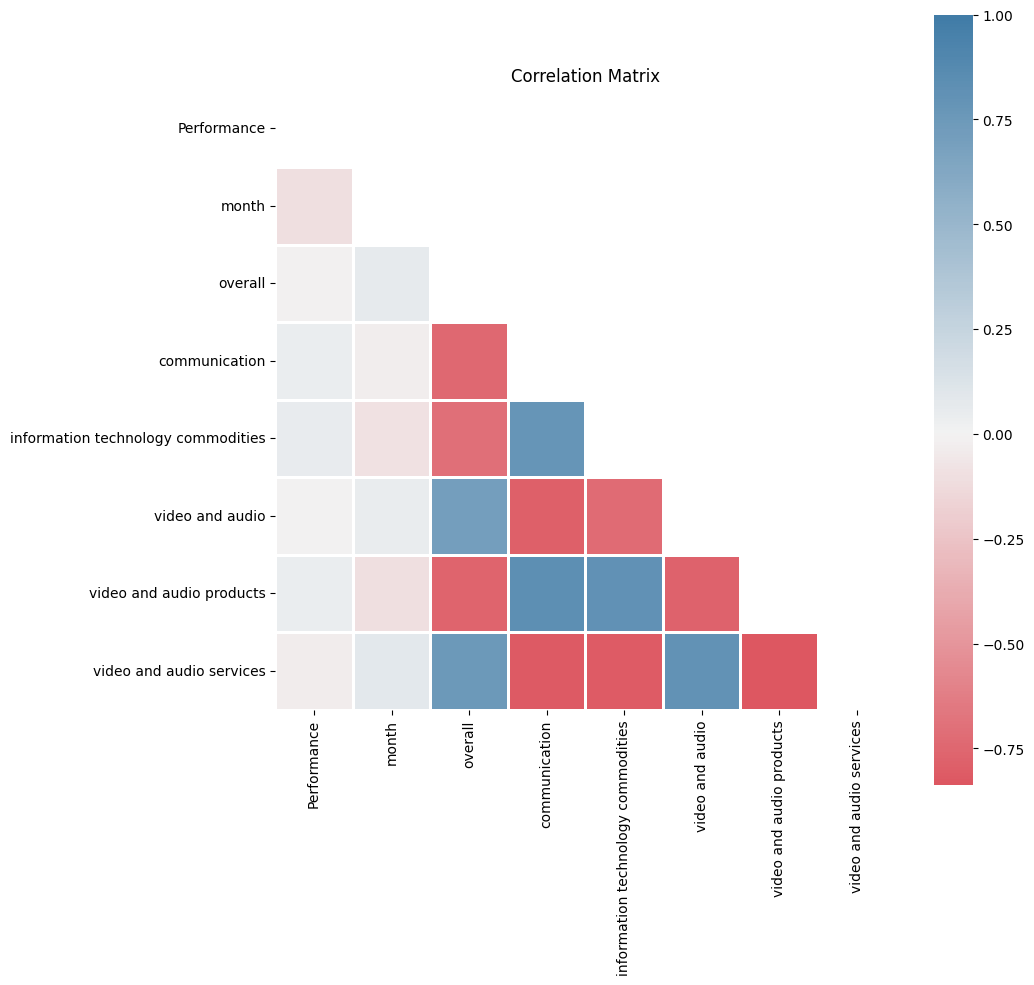

In [13]:
dd.correlation_matrix(samples)

In [14]:
X = samples.drop(['Performance'],axis=1)
y = samples['Performance']

### SMOTE Oversampling

In [15]:
counter = Counter(y)
print(counter)
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = Counter(y)
print(counter)

Counter({0: 8427, 1: 1573})
Counter({0: 8427, 1: 8427})


### Interaction Terms

In [16]:
poly = PolynomialFeatures(interaction_only=True,include_bias = False)
X_poly = poly.fit_transform(X.drop(['month'],axis=1))
X_poly

array([[  269.49268759,    72.65351808,    51.36637325, ...,
         4187.6176861 , 13594.97392107,  5296.17110402],
       [  228.48603561,    83.54722491,    99.09781798, ...,
         9528.59623137, 10429.68532205, 10129.04533135],
       [  265.47726119,    74.5830828 ,    52.15256813, ...,
         3847.81033919, 13325.17883568,  4516.14494346],
       ...,
       [  226.57534315,    82.14011738,    89.58724253, ...,
         8734.30613464, 10748.33968279,  9417.36552142],
       [  265.92312608,    74.75492878,    47.20918999, ...,
         3558.66780259, 14473.73161645,  4426.4867258 ],
       [  239.40812526,    80.35400547,    75.73994142, ...,
         7262.0899691 , 12675.85303232,  9251.94853921]])

In [17]:
month = X['month'].to_numpy()
month = np.reshape(month,(-1,1))
X = np.append(X_poly,month,1)
X.shape

(16854, 22)

In [18]:
X_real = original.drop(['Performance'],axis=1)
y_real = original['Performance']
X_real_poly = poly.fit_transform(X_real.drop(['month'],axis=1))
month = X_real['month'].to_numpy()
month = np.reshape(month,(-1,1))
X_real = np.append(X_real_poly,month,1)
X_real.shape

(144, 22)

In [19]:
stscaler = StandardScaler().fit(X)
X = stscaler.transform(X)
X_real = stscaler.transform(X_real)

### Training with CV

In [20]:
random_state = 42
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = random_state)
classifiers = []

classifiers.append(KNeighborsClassifier())
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(BaggingClassifier(random_state=random_state))
classifiers.append(SVC(random_state=random_state))
classifiers.append(GaussianNB())

k_fold = StratifiedKFold(n_splits=10)

Model_Comparison = pd.DataFrame(columns=['Name', 'CV Mean Accuracy', 'CV Mean Precision', 'CV Mean Recall',\
                                         'CV Mean F-1 Score', \
                                         'Accuracy', 'Precision', 'Recall', 'F-1 Score',\
                                        'Accuracy Real', 'Precision Real', 'Recall Real', 'F-1 Score Real'])
row = 0
for clf in classifiers:
    name = clf.__class__.__name__
    Model_Comparison.loc[row, 'Name'] = name
    
    Model_Comparison.loc[row, 'CV Mean Accuracy'] = cross_val_score(clf, X, y, scoring = 'accuracy', \
                                                                 cv = k_fold, n_jobs = 10).mean()
    Model_Comparison.loc[row, 'CV Mean Precision'] = cross_val_score(clf, X, y, scoring = 'precision',\
                                                                 cv = k_fold, n_jobs = 10).mean()
    Model_Comparison.loc[row, 'CV Mean Recall'] = cross_val_score(clf, X, y, scoring = 'recall', \
                                                                 cv = k_fold, n_jobs = 10).mean()
    Model_Comparison.loc[row, 'CV Mean F-1 Score'] = cross_val_score(clf, X, y, scoring = 'f1', \
                                                                 cv = k_fold, n_jobs = 10).mean()

    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    Model_Comparison.loc[row, 'Accuracy'] = accuracy_score(y_test, y_pred)
    Model_Comparison.loc[row, 'Precision'] = precision_score(y_test, y_pred)
    Model_Comparison.loc[row, 'Recall'] = recall_score(y_test, y_pred)
    Model_Comparison.loc[row, 'F-1 Score'] = f1_score(y_test, y_pred)
    
    y_pred = clf.predict(X_real)
    Model_Comparison.loc[row, 'Accuracy Real'] = accuracy_score(y_real, y_pred)
    Model_Comparison.loc[row, 'Precision Real'] = precision_score(y_real, y_pred)
    Model_Comparison.loc[row, 'Recall Real'] = recall_score(y_real, y_pred)
    Model_Comparison.loc[row, 'F-1 Score Real'] = f1_score(y_real, y_pred)
    
    row += 1
Model_Comparison

,Name,CV Mean Accuracy,CV Mean Precision,CV Mean Recall,CV Mean F-1 Score,Accuracy,Precision,Recall,F-1 Score,Accuracy Real,Precision Real,Recall Real,F-1 Score Real
0,KNeighborsClassifier,0.796667,0.723914,0.959301,0.825073,0.775273,0.698601,0.947907,0.804379,0.576389,0.442623,0.5,0.469565
1,DecisionTreeClassifier,0.763263,0.74316,0.80468,0.772578,0.770764,0.740921,0.814508,0.775974,0.611111,0.478261,0.407407,0.44
2,RandomForestClassifier,0.887684,0.86255,0.922277,0.891337,0.864262,0.828749,0.909445,0.867224,0.638889,0.545455,0.222222,0.315789
3,AdaBoostClassifier,0.654031,0.651047,0.663826,0.657196,0.659706,0.645403,0.669912,0.65743,0.611111,0.480769,0.462963,0.471698
4,GradientBoostingClassifier,0.687435,0.671488,0.733956,0.701247,0.687945,0.655448,0.75852,0.703227,0.625,0.5,0.462963,0.480769
5,ExtraTreesClassifier,0.915986,0.897433,0.939363,0.917872,0.902231,0.874886,0.932814,0.902922,0.625,0.5,0.148148,0.228571
6,BaggingClassifier,0.831258,0.823699,0.842771,0.833033,0.809207,0.791511,0.826193,0.80848,0.625,0.5,0.296296,0.372093
7,SVC,0.641867,0.633154,0.674507,0.653021,0.649264,0.624892,0.701558,0.661009,0.5,0.354839,0.407407,0.37931
8,GaussianNB,0.531683,0.531504,0.536137,0.533756,0.538443,0.525243,0.552093,0.538334,0.604167,0.476923,0.574074,0.521008


### Voting Classifier

In [21]:
et_clf = ExtraTreesClassifier(random_state=random_state)
bag_clf = BaggingClassifier(random_state=random_state)
rf_clf = RandomForestClassifier(random_state=random_state)
classifiers = [('RF', rf_clf), \
               ('ET', et_clf),\
              ('Bagging', bag_clf)]

vc = VotingClassifier(estimators = classifiers, voting = 'soft')     
vc.fit(x_train, y_train)
y_pred = vc.predict(x_test)
vc_res = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F-1 Score'])
vc_res.loc[0, 'Accuracy'] = accuracy_score(y_test, y_pred)
vc_res.loc[0, 'Precision'] = precision_score(y_test, y_pred)
vc_res.loc[0, 'Recall'] = recall_score(y_test, y_pred)
vc_res.loc[0, 'F-1 Score'] = f1_score(y_test, y_pred)
vc_res

,Accuracy,Precision,Recall,F-1 Score
0,0.869483,0.830404,0.920156,0.872979
